# Aproximación de una Integral con el Método de Monte Carlo de Muestreo por Importancia

El método de Monte Carlo de muestreo por importancia es una técnica utilizada para reducir la varianza en las estimaciones obtenidas mediante el método de Monte Carlo. Este método es especialmente útil cuando la función a integrar tiene regiones donde la contribución a la integral es mucho mayor que en otras regiones. El objetivo del muestreo por importancia es enfocar más puntos de muestreo en las regiones donde la función tiene más influencia, mejorando así la precisión de la estimación.

## Fundamentos del Muestreo por Importancia

Para aproximar la integral de una función $f(x)$ sobre un intervalo $[a, b]$:

$ I = \int_a^b f(x) \, dx $

en lugar de muestrear uniformemente en el intervalo $[a, b]$, se utiliza una función de densidad de probabilidad \$g(x)$ que se asemeje a la forma de $f(x)$. La función $g(x)$ debe cumplir:

1. $g(x) > 0$ para todos los $ x$ en $[a, b]$.
2. $ \int_a^b g(x) \, dx = 1 $ (es una densidad de probabilidad).

La integral puede reescribirse utilizando $g(x)$ como:

$I = \int_a^b \frac{f(x)}{g(x)} g(x) \, dx $

Luego, la estimación de Monte Carlo para la integral se convierte en:

$I \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{g(x_i)} $

donde $x_i$ son muestras tomadas de la distribución $g(x)$.

## Pasos para Implementar el Muestreo por Importancia

1. **Elegir una función de densidad de probabilidad $g(x)$**: La elección de $g(x)$ es crucial y debe aproximarse a la forma de $f(x)$ para ser efectiva.
2. **Generar muestras de $g(x)$**: Generar muestras que sigan la distribución $g(x)$.
3. **Evaluar $f(x)$ y $g(x)$**: Calcular los valores de $f(x)$ y  $g(x)$ para las muestras generadas.
4. **Calcular la estimación**: Usar la fórmula de la estimación de Monte Carlo con muestreo por importancia.

## Ejemplo

Supongamos que queremos aproximar la integral de $f(x) = \sin(x)$ sobre el intervalo $[0, \frac{\pi}{2}]$ usando una distribución normal como función de densidad de probabilidad $g(x)$.

### Importamos librerias

In [116]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Definimos dos funciones 

* "f(x)"
* "g(x)"
* "estabilidad_simulacion()"
* "sim()"

In [117]:
def f(x):
    return np.sin(x)

In [118]:
def g(x):
    return 8/(np.pi**2) * x

In [119]:
def estabilidad_simulacion(ensayos, area):
    plt.plot(ensayos,area)
    plt.xlabel('Número de ensayos')
    plt.ylabel('Aproximación al valor de ')
    plt.show()

In [120]:
def experimento(a, b, n):
    f_x = []
    g_x = []
    y = []

    for i in range(n): 
        x = np.random.uniform(a, b)
        f_x.append(f(x))
        g_x.append(g(x))
        y.append( np.mean(sum(f_x )/ sum(g_x)))

    integral = sum(f_x )/ sum(g_x)

    return integral, y

In [121]:
def sim(repeticiones,a,b): 
    aproximacion = []
    for i in range(repeticiones):
        aproximacion.append(experimento(a, b, repeticiones)[0])
         
    return aproximacion 

### Llamamos a la funciones


 La aproximación de la integar nos da.  0.9990097882954481


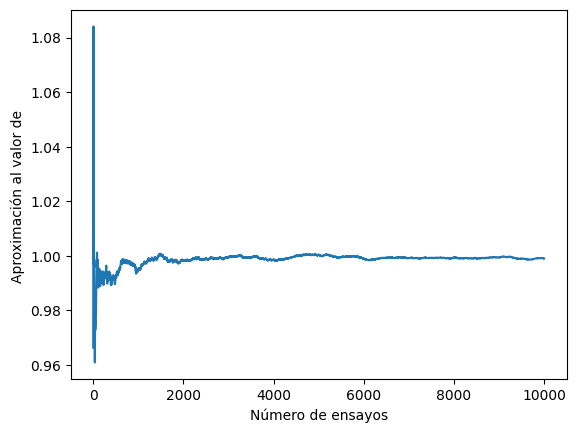

In [122]:
a = 0
b = np.pi / 2
n = 10000

aprox = experimento(a, b, n)
    
print("\n La aproximación de la integar nos da. ",aprox[0])

ensayos1 = range(0,n)

estabilidad_simulacion(ensayos1, aprox[1])

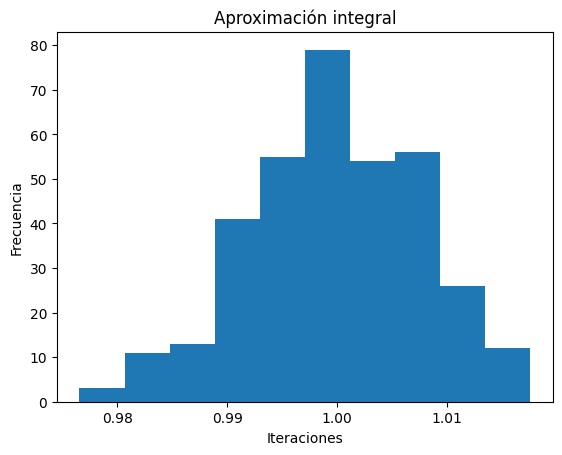

In [125]:
N = 350
simulacion = sim(N, a, b)

np.mean(simulacion)

plt.hist(simulacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación integral')
plt.show()